In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
diff = y - y_pred
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grade_w1, grade_w2 = tf.gradients(loss, [w1,w2])

In [3]:
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D)}
    out = sess.run([loss, grade_w1, grade_w2], feed_dict=values)
    loss_val, grade_w1_val, grade_w2_val = out

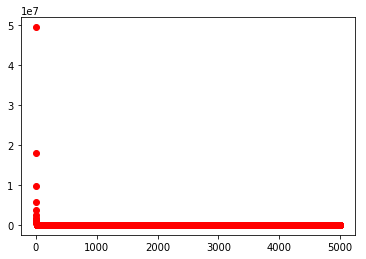

49457540.0 973.43475 973.4347


In [6]:
l_rate=1e-5
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D)}
    loss_summery=[]
    steps=5000
    for t in range(steps):
        out = sess.run([loss, grade_w1, grade_w2], feed_dict=values)
        loss_val, grade_w1_val, grade_w2_val = out
        values[w1] -= l_rate * grade_w1_val
        values[w2] -= l_rate * grade_w2_val
        loss_summery.append(loss_val)
    plt.plot(range(steps),loss_summery, 'ro',label='loss_value')
    plt.show()
    print(loss_summery[0], loss_summery[steps-1], loss_summery[steps-2])